In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
# function used
def f(x, y):
    return np.sin((x ** 2 + y ** 2))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

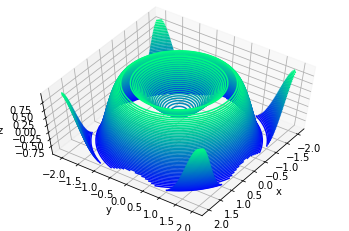

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

In [4]:
def find_direction(X0, Y0, dw=0.01):
    X1 = X0 + dw
    Y1 = Y0 + dw
    grad_x = (f(X1,Y0)-f(X0,Y0))/dw
    grad_y = (f(X0,Y1)-f(X0,Y0))/dw
    return grad_x, grad_y

# Gradient Descent without momentum

In [5]:
max_iter = 300
lr = 0.1
X0 = 0
Y0 = -1
cur_iter = 0
steps_x = [X0]
steps_y = [Y0]
steps_z = [f(X0, Y0)]

while True:
    # get closer to a local min
    grad_x, grad_y = find_direction(X0, Y0)
    X1 = X0 - lr*grad_x
    Y1 = Y0 - lr*grad_y
    # save step
    steps_x.append(X1)
    steps_y.append(Y1)
    steps_z.append(f(X1, Y1))
    # calculate step size
    step_size_x = abs(X0 - X1)
    step_size_y = abs(Y0 - Y1)
    # save new step
    X0 = X1
    Y0 = Y1
    if cur_iter > max_iter:
        print("Max iter reached")
        break
    if step_size_x < 0.00001 and step_size_y < 0.00001:
        print("Local min reached")
        break
    elif cur_iter%20 == 0:
        lr = lr*0.7
        print("Iteration {} has x value ({},{})".format(cur_iter, X1, Y1))
    cur_iter = cur_iter + 1

Iteration 0 has x value (-0.0005402602314186211,-0.8908208378617091)
Iteration 20 has x value (-0.004751591244467476,-0.054173668836423425)
Iteration 40 has x value (-0.004968428272909054,-0.01124976677836268)
Iteration 60 has x value (-0.004992378806027788,-0.0065086499564398215)
Iteration 80 has x value (-0.004997151740823854,-0.005563825838227635)
Local min reached


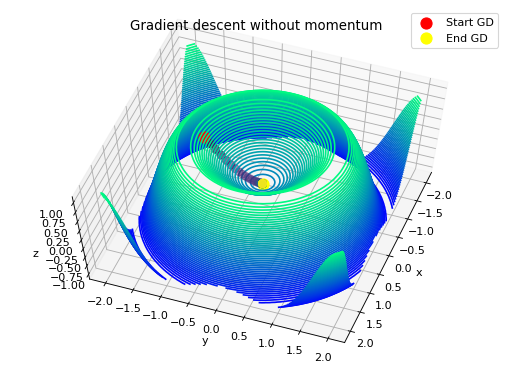

In [6]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
color = [item/255 for item in list(range(len(steps_x)))]
ax.scatter(steps_x, steps_y, steps_z, s=50, c=color)
ax.scatter(steps_x[0], steps_y[0], steps_z[0], s=100, c='red', label='Start GD')
ax.scatter(steps_x[-1], steps_y[-1], steps_z[-1], s=100, c='yellow', label='End GD')
ax.contour3D(X, Y, Z, 50, cmap='winter')
plt.title('Gradient descent without momentum')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(65, 20)
fig.savefig('../plots/3D_GD_without_momentum.png')

# Gradient Descent with momentum

In [7]:
max_iter = 300
lr = 0.1
X0 = 0
Y0 = -1.2
cur_iter = 0
steps_x = [X0]
steps_y = [Y0]
steps_z = [f(X0, Y0)]

momentum = 0.99
last_m_taken = 10
moment_x = [0]
moment_y = [0]

while True:
    # get closer to a local min
    grad_x, grad_y = find_direction(X0, Y0)
    X1 = X0 - lr*grad_x
    Y1 = Y0 - lr*grad_y
    moment_x.append(-lr*grad_x)
    moment_y.append(-lr*grad_y)
    moment_x = [momentum*x for x in moment_x]
    moment_y = [momentum*x for x in moment_y]
    m_x = sum(moment_x[-last_m_taken:])
    m_y = sum(moment_y[-last_m_taken:])
    X1 = X1 + m_x
    Y1 = Y1 + m_y
    # save step
    steps_x.append(X1)
    steps_y.append(Y1)
    steps_z.append(f(X1, Y1))
    # calculate step size
    step_size_x = abs(X0 - X1)
    step_size_y = abs(Y0 - Y1)
    # save new step
    X0 = X1
    Y0 = Y1
    if cur_iter > max_iter:
        print("Max iter reached")
        break
    if step_size_x < 0.0001 and step_size_y < 0.0001:
        print("Local min reached")
        break
    elif cur_iter%70 == 0:
        lr = lr*0.7
        print("Iteration {} has x value ({},{})".format(cur_iter, X1, Y1))
    cur_iter = cur_iter + 1

Iteration 0 has x value (-0.0002594445298519932,-1.132340360696538)
Iteration 70 has x value (-0.007576874138549411,0.5626489446155296)
Iteration 140 has x value (-0.03311806032390507,2.102276208450706)
Iteration 210 has x value (-0.08269310928647383,2.0839890930556564)
Iteration 280 has x value (-0.18234322359822205,2.2253003766575694)
Max iter reached


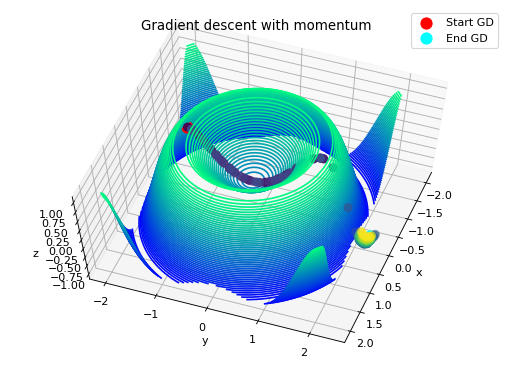

In [8]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
color = [item/255 for item in list(range(len(steps_x)))]
ax.scatter(steps_x[0], steps_y[0], steps_z[0], s=100, c='red', label='Start GD')
ax.scatter(steps_x[-1], steps_y[-1], steps_z[-1], s=100, c='cyan', label='End GD')
ax.scatter(steps_x, steps_y, steps_z, s=50, c=color)
ax.contour3D(X, Y, Z, 50, cmap='winter')
plt.title('Gradient descent with momentum')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(65, 20)
fig.savefig('../plots/3D_GD_with_momentum.png')